# Assignment-2 (Sampling)

## Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

## Importing Dataset

In [21]:
data=pd.read_csv("Creditcard_data.csv")

## Exploring Dataset

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [23]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


<AxesSubplot: >

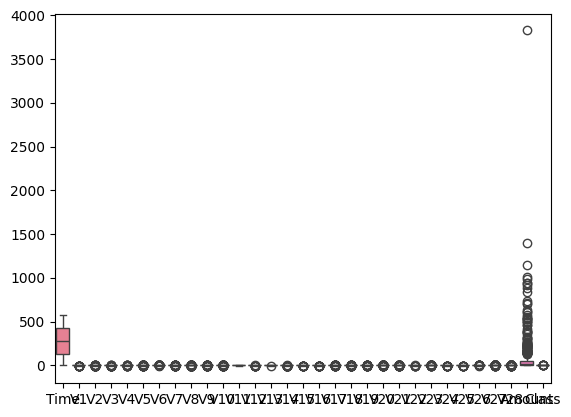

In [24]:
sns.boxplot(data)

## Removing based on outliers of Amount Feature

In [25]:
q1=data.Amount.quantile(0.25)
q3=data.Amount.quantile(0.75)
iqr=q3-q1

lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)

In [26]:
df=data[(data['Amount']>=lower_bound) & (data['Amount']<=upper_bound)]

<AxesSubplot: >

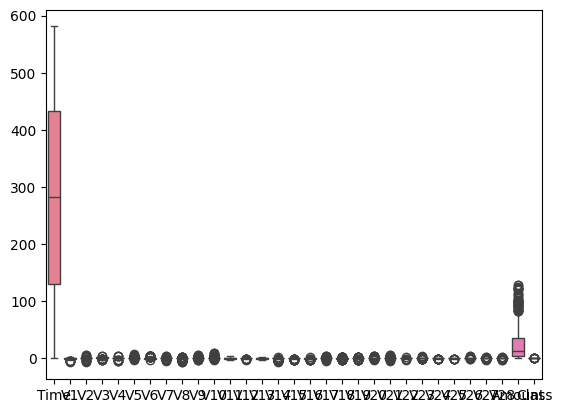

In [27]:
sns.boxplot(df)

## Looking at imbalanced data

In [28]:
df.Class.value_counts()

Class
0    676
1      8
Name: count, dtype: int64

<AxesSubplot: xlabel='Class', ylabel='Count'>

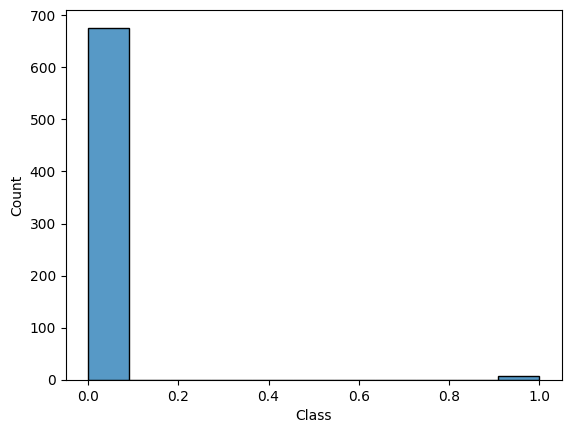

In [29]:
sns.histplot(df.Class)

## Making Dataset balanced

### Removing using Tomek links from majority class

In [30]:
x=df.drop(columns=['Class'])
y=df['Class']

In [31]:
y.value_counts()

Class
0    676
1      8
Name: count, dtype: int64

In [32]:
from imblearn.under_sampling import TomekLinks

t1=TomekLinks(sampling_strategy='majority')
x,y=t1.fit_resample(x,y)

In [33]:
y.value_counts()

Class
0    670
1      8
Name: count, dtype: int64

## Using smote technique to oversample minority class to 250 values (adding 242 values)

In [34]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy={1:242+sum(y==1)},random_state=31)

x,y=smote.fit_resample(x,y)

In [35]:
y.value_counts()

Class
0    670
1    250
Name: count, dtype: int64

## Finally using Nearmiss(version-1) to make the dataset balanced

In [36]:
from imblearn.under_sampling import NearMiss

nearmiss=NearMiss(version=1)

x,y=nearmiss.fit_resample(x,y)

In [37]:
y.value_counts()

Class
0    250
1    250
Name: count, dtype: int64

<AxesSubplot: xlabel='Class', ylabel='Count'>

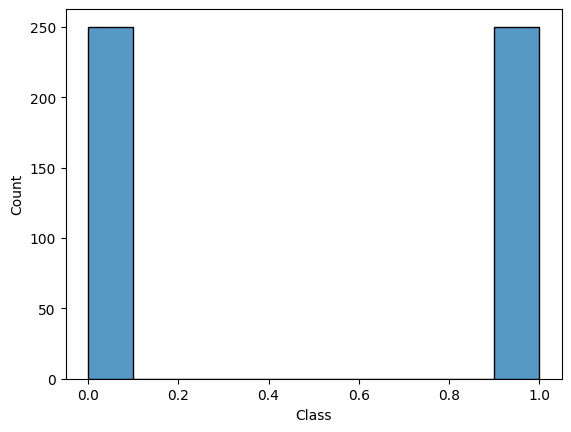

In [38]:
sns.histplot(y)

## Final balanced dataset is obtained of size 500